## *santoshhulbutti@gmail.com | DataTrained | Evaluation Project # 06

## loan_prediction

<h1 align = "center"><font color = "red">Importing necessary libraries</font></h1>

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)

import statsmodels.api as sm

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

#logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier & Gradient Boosting Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

#C-Support Vector Classification
from sklearn.svm import SVC

#Naive_bayes
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc


import pickle

import warnings
warnings.filterwarnings('ignore')

<h1 align = "center"><font color = "red">Getting the Data</font></h1>

In [157]:
data_url = "https://raw.githubusercontent.com/santoshhulbutti/-DataTrained_Evaluation_Projects/main/Loan%20Application%20Status%20Prediction/loan_prediction.csv"

data0 = pd.read_csv(data_url)

<h1 align="center"><font color = "red">Data Visualization & EDA</font> </h1>

<h2><font color = "blue">01. Checking the data using .head(), .shape, features' dtypes using .info()</font></h2>

In [158]:
data0.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
data0.shape

(614, 13)

In [160]:
unique_null_data = pd.DataFrame(list(zip(data0.nunique(), data0.isnull().sum(), data0.dtypes)),
                                columns = ['unique_entries', 'missing values', 'Dtypes'],
                               index=data0.columns)
unique_null_data

,unique_entries,missing values,Dtypes
Loan_ID,614,0,object
Gender,2,13,object
Married,2,3,object
Dependents,4,15,object
Education,2,0,object
Self_Employed,2,32,object
ApplicantIncome,505,0,int64
CoapplicantIncome,287,0,float64
LoanAmount,203,22,float64
Loan_Amount_Term,10,14,float64


In [161]:
data0.dtypes.value_counts()

object     8
float64    4
int64      1
dtype: int64

### Observation:
The data set has 614 rows of data & 13 Columns.

1. there is 1 integer type of feature.
2. 8 eatures of object datatype consisting ordinal & nominal categories.
3. Loan_Status feature(Traget variable) is also object datatype.
4. there are missing values in Gender, married, Dependents, Self Employed, loan_amount, Loan_amount_term & credit history.

<h2><font color = "blue">02. Checking for descriptive statistics...</font></h2>

In [162]:
#Descriptive statistics
data0.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [163]:
#Descriptive statistics
data0.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [164]:
data0.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Observation:
1. We see missing observation from count column, the features with missing values are;
    - Gender
    - Married
    - Dependents
    - Self_Employed
    - LoanAmount
    - Loan_Amount_Term
    - Credit_History
2. CoapplicantIncome & Credit_History have entries/observations with minimum value as 0.0.

<h2><font color = "blue">03. Checking for duplicate entries...</font></h2>

In [165]:
data0.duplicated().sum()

0

### Observations:
1. No Duplicate entries.

<h2><font color = "blue">04. Filling missing entries...</font></h2>

In [166]:
## Checking for unique entries in each categorical columns
print(data0["Gender"].value_counts())
print(' ')
print(data0["Married"].value_counts())
print(' ')
print(data0["Dependents"].value_counts())
print(' ')
print(data0["Self_Employed"].value_counts())
print(' ')
print(data0["Credit_History"].value_counts())
print(' ')

Male      489
Female    112
Name: Gender, dtype: int64
 
Yes    398
No     213
Name: Married, dtype: int64
 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 
No     500
Yes     82
Name: Self_Employed, dtype: int64
 
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 


### filling Gender, Married, Dependent, self employed & credit history using mode method

In [167]:
dep_dict = {'0':0,'1':1,'2':2,'3+':3}
data0["Dependents"] = data0["Dependents"].map(dep_dict)

In [168]:
# for gender we will use mode method to fill missing entries
data0["Gender"] = data0["Gender"].fillna(data0["Gender"].mode()[0])
data0["Married"] = data0["Married"].fillna(data0["Married"].mode()[0])
data0["Dependents"] = data0["Dependents"].fillna(data0["Dependents"].mode()[0])
data0["Self_Employed"] = data0["Self_Employed"].fillna(data0["Self_Employed"].mode()[0])
data0["Credit_History"] = data0["Credit_History"].fillna(data0["Credit_History"].mode()[0])

### filling LoanAmount using mean method

In [169]:
data0["LoanAmount"] = data0["LoanAmount"].fillna(data0["LoanAmount"].mean())

### filling Loan_Amount_Term using based on LoanAmount

In [170]:
# Index of missing values in Loan_Amount_Term
index_missing = list(data0["Loan_Amount_Term"][data0["Loan_Amount_Term"].isnull()].index)

In [171]:
loan_term = data0.groupby('LoanAmount')['Loan_Amount_Term'].max()

In [172]:
loan_term

LoanAmount
9.0      360.0
17.0     120.0
25.0     120.0
26.0     360.0
30.0     360.0
         ...  
500.0    360.0
570.0    360.0
600.0    360.0
650.0    480.0
700.0    300.0
Name: Loan_Amount_Term, Length: 204, dtype: float64

In [173]:
for i in index_missing:
    loan = data0['LoanAmount'].iloc[i]
    data0["Loan_Amount_Term"].iloc[i] = loan_term.iloc[int(loan)]

In [174]:
data0.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Observation:
1. missing values are filled.

In [175]:
data0.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [176]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Credit_History']
# cat_cols = []
# for column in data0.columns:
#     if column in num_cols:
#         pass
#     else:
#         cat_cols.append(column)

cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'Loan_Amount_Term', 'Property_Area', 'Loan_Status']

In [177]:
data0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


### Converting categorical features with integer values to string/object dtype

In [178]:
data0[num_cols].dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History       float64
dtype: object

In [179]:
data0[cat_cols].dtypes

Gender               object
Married              object
Dependents          float64
Education            object
Self_Employed        object
Loan_Amount_Term    float64
Property_Area        object
Loan_Status          object
dtype: object

In [180]:
for feat in data0[cat_cols].columns:
    if data0[feat].dtype !='object':
        data0[feat] = data0[feat].astype(str)

In [181]:
data0[cat_cols].dtypes

Gender              object
Married             object
Dependents          object
Education           object
Self_Employed       object
Loan_Amount_Term    object
Property_Area       object
Loan_Status         object
dtype: object

In [182]:
# Dropping loan ID
data1 =data0.drop('Loan_ID', axis=1)

In [183]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


<h2 align="center"><font color = "red">EDA : Data Visualization</font> </h2>

### Numerical features :
- 'ApplicantIncome'
- 'CoapplicantIncome'
- 'LoanAmount'
- 'Credit_History'

### Categorical features :
- 'Gender'
- 'Married'
- 'Dependents'
- 'Education'
- 'Self_Employed'
- 'Loan_Amount_Term'
- 'Property_Area'
- 'Loan_Status'

In [184]:
data1_num = data1[num_cols]
data1_cat = data1[cat_cols]

## 06 Univariate Analysis

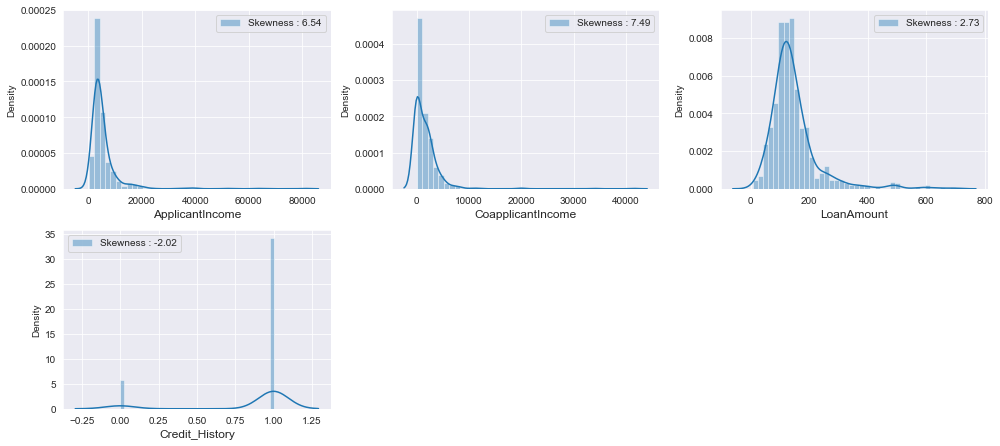

In [186]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(14,12))
for column in data1_num.columns:
    plt.subplot(4,3,i+1)
    sns.distplot(data1_num[column], bins=40, label="Skewness : %.2f"%(data1_num[column].skew())).legend(loc="best")
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation:
1.all numerical features except credit history are right skewed.

### distinct/unique values in the categorical features

In [187]:
#To count distinct/unique values in the categorical features
for column in data1_cat:
    print(' ')
    print('----  ' + column + '  ----')
    x = data1_cat[column].value_counts()
    print(x)
    print('#'*50)

 
----  Gender  ----
Male      502
Female    112
Name: Gender, dtype: int64
##################################################
 
----  Married  ----
Yes    401
No     213
Name: Married, dtype: int64
##################################################
 
----  Dependents  ----
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
##################################################
 
----  Education  ----
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
##################################################
 
----  Self_Employed  ----
No     532
Yes     82
Name: Self_Employed, dtype: int64
##################################################
 
----  Loan_Amount_Term  ----
360.0    524
180.0     45
480.0     16
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
##################################################
 
----  Property_Area  ----
Semiurban    233
Urban        202
Rural   

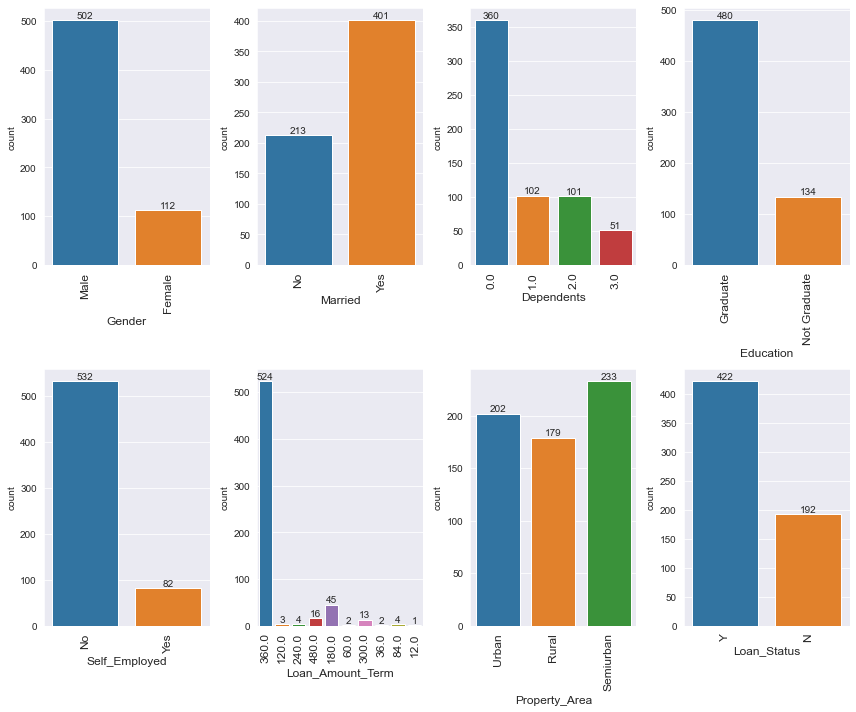

In [188]:
#distribution of numerical features using countplot
i=0
plt.figure(figsize=(12,10))
for column in data1_cat.columns:
    plt.subplot(2,4,i+1)
#     ax = sns.barplot(x=column,data=data1_cat, errwidth=0)
    ax = sns.countplot(x= data1_cat[column])
    ax.bar_label(ax.containers[0]);
    plt.xticks(fontsize = 12, rotation=90)
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

### Observation:
1. most loan applicants are Male.
2. most of the applicants were married.
3. most of the applocants were not having any dependents.
4. Those with a graduate degree applied for loan mostly.
5. most of the applicants were having job.
6. most of the applicants opted for 30 years of loan term.
7. applicants were almost applied in same proportions in property area.
8. for most of the applicants loans were approved.

## 07 Bivariate Analysis

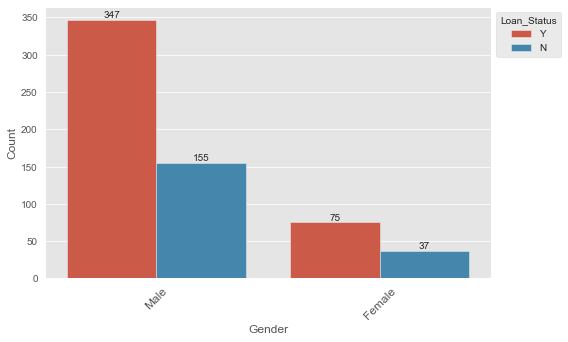

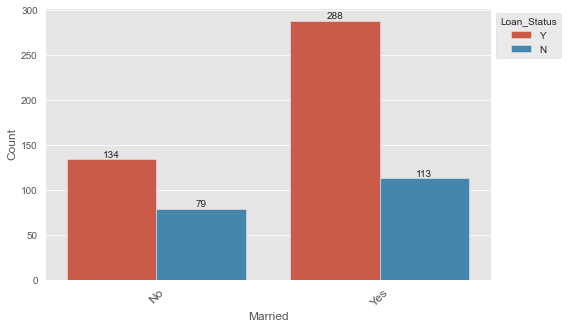

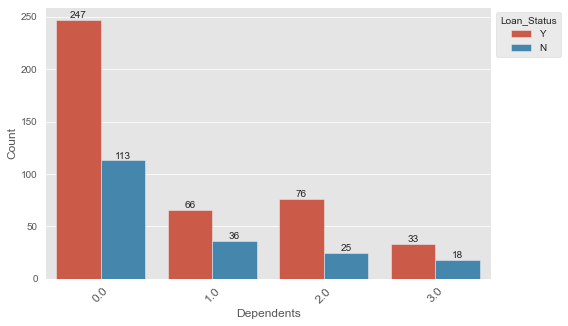

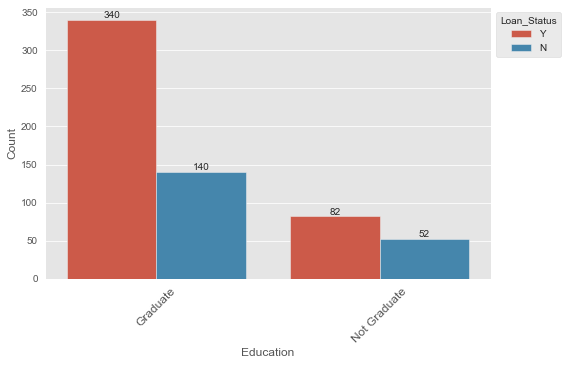

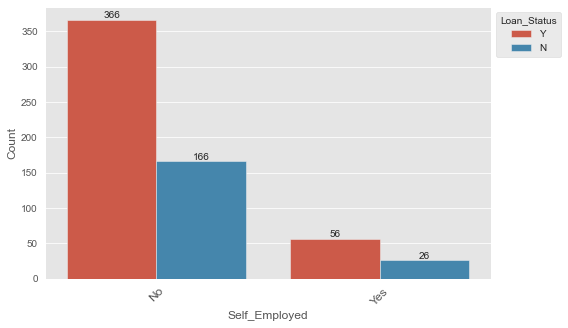

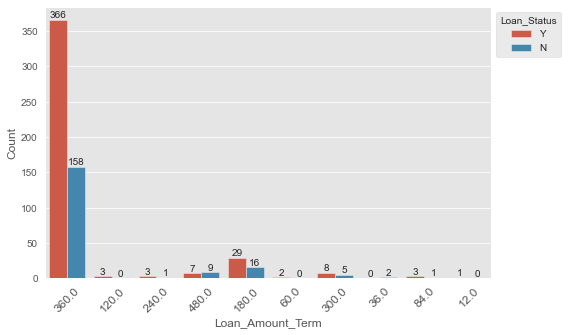

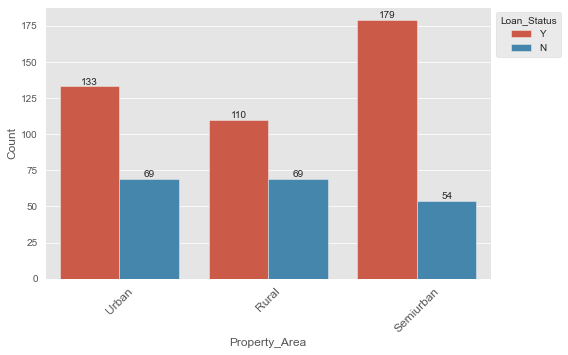

In [283]:
for item in data1_cat[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Property_Area']].columns:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=item,hue='Loan_Status',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

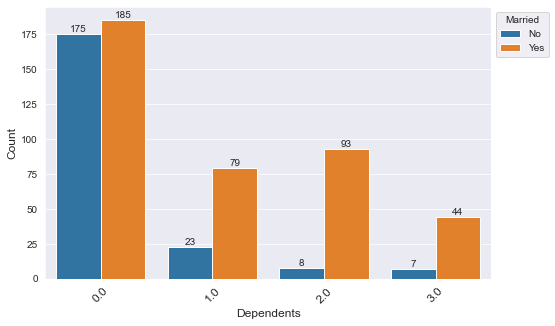

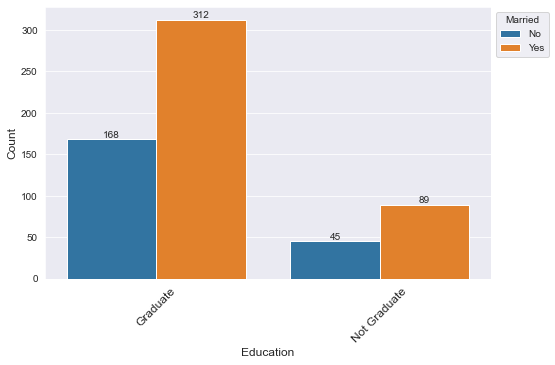

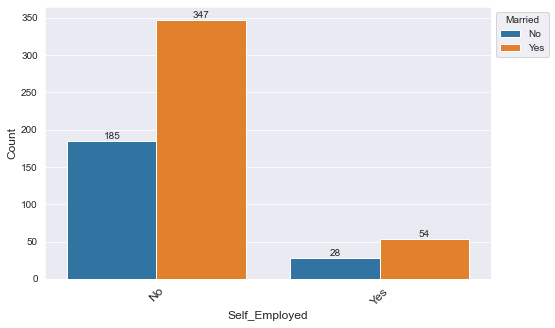

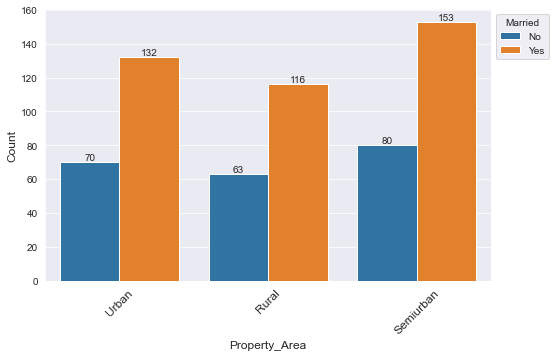

In [192]:
for item in data1_cat[['Dependents', 'Education', 'Self_Employed', 'Property_Area']].columns:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=item,hue='Married',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

### Observation:
1. The above graphs show, how other categorical features are distributed based on Job role.

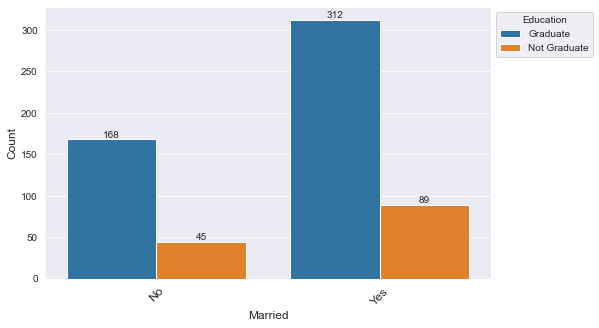

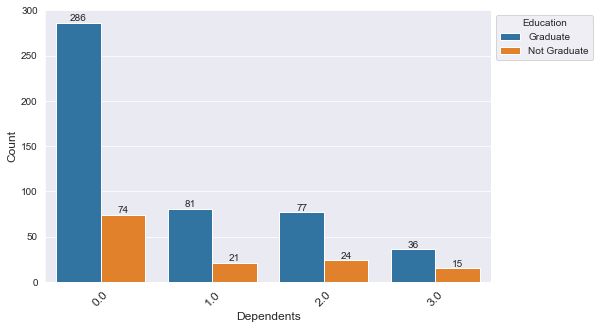

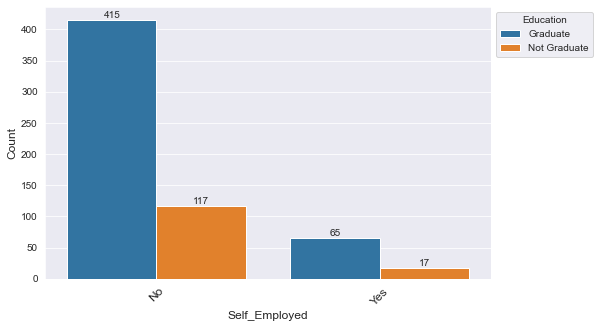

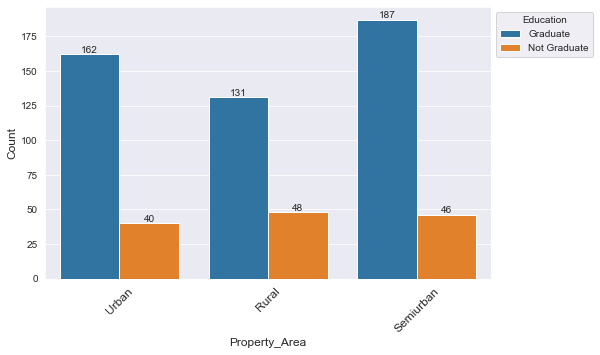

In [193]:
for item in data1_cat[['Married', 'Dependents', 'Self_Employed', 'Property_Area']].columns:
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=item,hue='Education',data=data1_cat)
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xticks(fontsize = 12, rotation=45)
    plt.ylabel(ylabel = 'Count', fontsize = 12)
    plt.xlabel(xlabel = item, fontsize = 12)

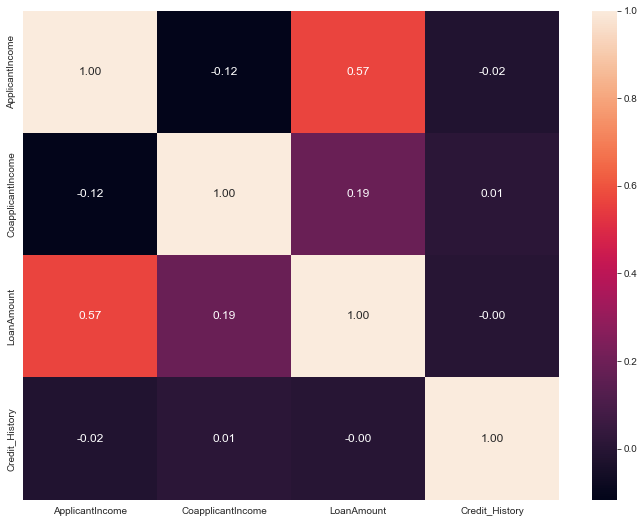

In [194]:
plt.figure(figsize=(12,9))
sns.heatmap(data1_num.corr(),annot=True, fmt = ".2f", annot_kws={'size':12});
plt.show()

### Observation:
1.The heat map shows there are some independant features whic shows multicollinearity with each other. 

<h2 align="center"><font color = "red">Data Cleaning & Preprocessing</font> </h2>

### Observation:
1. The above graphs show, how other categorical features are distributed based on Education level.

In [195]:
data1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [196]:
num_cols

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']

In [197]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Property_Area',
 'Loan_Status']

In [202]:
data2 = data1.copy()

In [203]:
for i in cat_cols:
    print('==================')
    print(data2[i].value_counts())
    print(' ')

Male      502
Female    112
Name: Gender, dtype: int64
 
Yes    401
No     213
Name: Married, dtype: int64
 
0.0    360
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 
No     532
Yes     82
Name: Self_Employed, dtype: int64
 
360.0    524
180.0     45
480.0     16
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 
Y    422
N    192
Name: Loan_Status, dtype: int64
 


In [204]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## Encoding Categorical, Ordinal & nominal features

In [205]:
gender_dict = {'Male':1, 'Female':0}
married_dict = {'Yes':1, 'No':0}
edu_dict = {'Graduate':1,'Not Graduate':0}
self_emp_dict = {'Yes':1, 'No':0}
prop_dict = {'Urban':3, 'Semiurban':2,'Rural':1}
loan_status_dict = {'Y' :1, 'N':0}

data2["Gender"] = data2["Gender"].map(gender_dict)
data2["Married"] = data2["Married"].map(married_dict)
data2["Education"] = data2["Education"].map(edu_dict)
data2["Self_Employed"] = data2["Self_Employed"].map(self_emp_dict)
data2["Property_Area"] = data2["Property_Area"].map(prop_dict)
data2["Loan_Status"] = data2["Loan_Status"].map(loan_status_dict)

data2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,3.0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1.0,1,0,8072,240.0,253.000000,360.0,1.0,3,1
612,1,1,2.0,1,0,7583,0.0,187.000000,360.0,1.0,3,1


In [209]:
data2['Dependents'] = data2['Dependents'].astype(float)

In [210]:
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,3,1
1,1,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,1,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,1,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,3,1


In [212]:
pd.set_option('max_columns', None)
data3 = pd.get_dummies(data2, drop_first = True)
data3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0
0,1,0,0.0,1,0,5849,0.0,146.412162,1.0,3,1,0,0,0,0,0,1,0,0,0
1,1,1,1.0,1,0,4583,1508.0,128.000000,1.0,1,0,0,0,0,0,0,1,0,0,0
2,1,1,0.0,1,1,3000,0.0,66.000000,1.0,3,1,0,0,0,0,0,1,0,0,0
3,1,1,0.0,0,0,2583,2358.0,120.000000,1.0,3,1,0,0,0,0,0,1,0,0,0
4,1,0,0.0,1,0,6000,0.0,141.000000,1.0,3,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,1,0,2900,0.0,71.000000,1.0,1,1,0,0,0,0,0,1,0,0,0
610,1,1,3.0,1,0,4106,0.0,40.000000,1.0,1,1,0,1,0,0,0,0,0,0,0
611,1,1,1.0,1,0,8072,240.0,253.000000,1.0,3,1,0,0,0,0,0,1,0,0,0
612,1,1,2.0,1,0,7583,0.0,187.000000,1.0,3,1,0,0,0,0,0,1,0,0,0


In [293]:
data2.dtypes.value_counts()

float64    16
int64      15
dtype: int64

In [213]:
data3.isna().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Credit_History            0
Property_Area             0
Loan_Status               0
Loan_Amount_Term_120.0    0
Loan_Amount_Term_180.0    0
Loan_Amount_Term_240.0    0
Loan_Amount_Term_300.0    0
Loan_Amount_Term_36.0     0
Loan_Amount_Term_360.0    0
Loan_Amount_Term_480.0    0
Loan_Amount_Term_60.0     0
Loan_Amount_Term_84.0     0
dtype: int64

In [214]:
data3.duplicated().sum()

0

## removing skewness from numerical features

In [219]:
data4 = data3.copy()

In [220]:
data4[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
dtype: float64

In [221]:
x = data4[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)

x_pt = pt.fit_transform(x)
x_pt = pd.DataFrame(x_pt, columns = x.columns)


num_feat = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in num_feat:
    data4[col]=x_pt[col]
    
    
data4[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].skew()

ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
dtype: float64

### Observation:
Skewness is removed.

## Checking for outliers & removing..

In [224]:
# creating a function to remove outliers using standard deviation method...
def get_outliers_std(data):
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
        data_mean, data_std = np.mean(data[column]), np.std(data[column])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove #returns list of indices to remove outliers

# data.drop(data.index[indices_to_remove])



#  creating a function to remove outliers using inter quantile range...
def get_outliers_iqr(data):
    
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    
    #empty list to store index values
    all_indices = []
    
    for column in data.columns:
#         data_mean, data_std = np.mean(data[column]), np.std(data[column])
#         cut_off = data_std * 3
        lower, upper = (q1[column] - (1.5*iqr[column])) , (q3[column] + (1.5*iqr[column]))

        index = np.where((data[column] < lower) | (data [column] > upper))

        all_indices.extend(index[0])
    
    set_res = set(all_indices)
    indices_to_remove = np.array(list(set_res))
#     print(indices_to_remove)
    return indices_to_remove#data.drop(data.index[indices_to_remove]) #returns the data with removed outliers

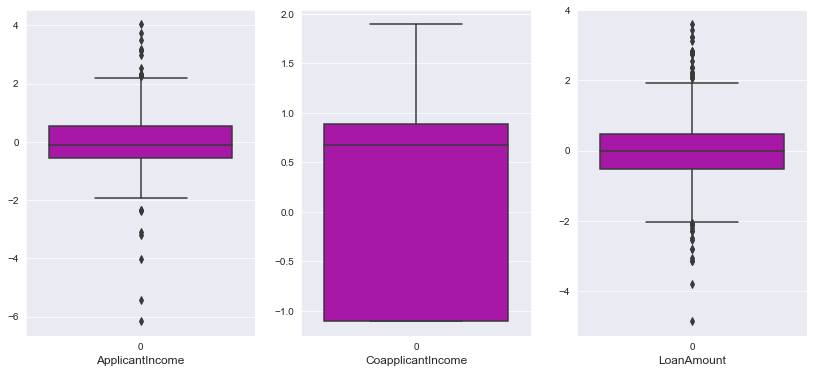

In [223]:
plt.figure(figsize=(14,6))
plotnumber=1
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    if plotnumber<=12:
        ax=plt.subplot(1,3,plotnumber)
        sns.boxplot(data4[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

## Using Z score method..

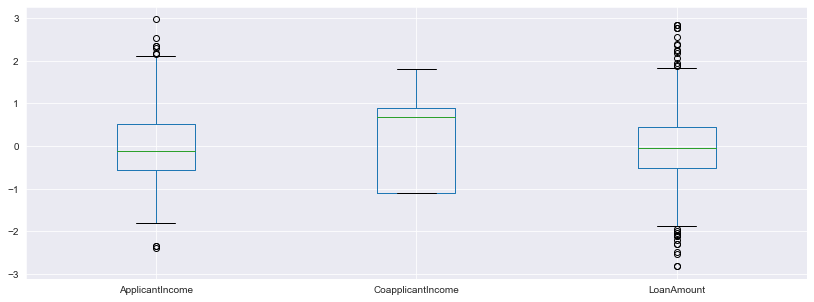

Total Data loss after removing Outliers :  3.09


In [231]:
data_out = data4[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
to_remove_std = get_outliers_std(data_out)
data_out = data_out.drop(data_out.index[to_remove_std])
data4_std = data4.drop(data4.index[to_remove_std])


data_out.iloc[:,:].boxplot(figsize = (14,6))
plt.subplots_adjust(bottom=0.25)
plt.show()


total_data_loss = (data3.shape[0] - data4_std.shape[0])*100/data3.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

## Using IQR Method to remove outliers..

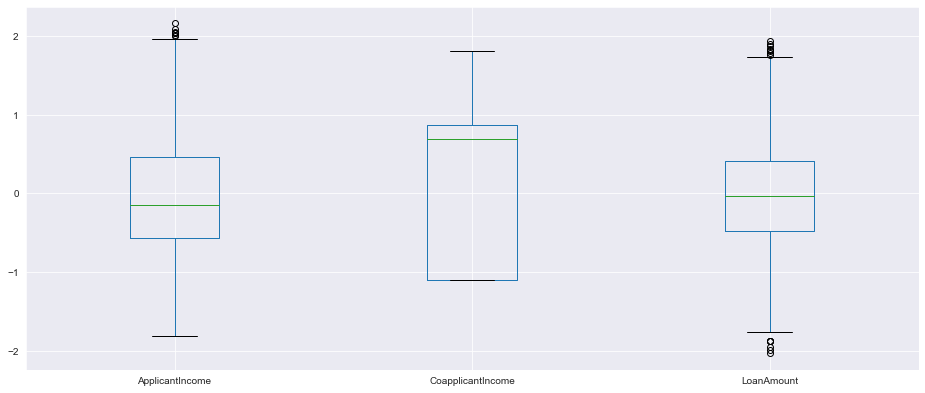

Total Data loss after removing Outliers :  7.82


In [232]:
data_out = data4[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]
to_remove_iqr = get_outliers_iqr(data_out)
data_out = data_out.drop(data_out.index[to_remove_iqr])
data4_iqr = data4.drop(data4.index[to_remove_iqr])


data_out.iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()


total_data_loss = (data3.shape[0] - data4_iqr.shape[0])*100/data3.shape[0]
print('Total Data loss after removing Outliers : ', round(total_data_loss,2))

In [234]:
data5 = data4_iqr.copy()
# data5
data5.reset_index(drop=True, inplace=True)
data5

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0
0,1,0,0.0,1,0,0.544331,-1.102837,0.235387,1.0,3,1,0,0,0,0,0,1,0,0,0
1,1,1,1.0,1,0,0.170974,0.750578,-0.037659,1.0,1,0,0,0,0,0,0,1,0,0,0
2,1,1,0.0,1,1,-0.499955,-1.102837,-1.346305,1.0,3,1,0,0,0,0,0,1,0,0,0
3,1,1,0.0,0,0,-0.743873,0.891686,-0.167886,1.0,3,1,0,0,0,0,0,1,0,0,0
4,1,0,0.0,1,0,0.582817,-1.102837,0.158610,1.0,3,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,1,0.0,1,0,-0.379921,0.831258,-0.379235,1.0,1,1,0,0,0,0,0,1,0,0,0
562,0,0,0.0,1,0,-0.554885,-1.102837,-1.205100,1.0,1,1,0,0,0,0,0,1,0,0,0
563,1,1,1.0,1,0,1.023487,0.208603,1.372409,1.0,3,1,0,0,0,0,0,1,0,0,0
564,1,1,2.0,1,0,0.931750,-1.102837,0.738924,1.0,3,1,0,0,0,0,0,1,0,0,0


In [235]:
rearenge_cols = data5.columns.to_list()
rearenge_cols.remove('Loan_Status')
rearenge_cols.append('Loan_Status')
data6 = data5[rearenge_cols]
data6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Status
0,1,0,0.0,1,0,0.544331,-1.102837,0.235387,1.0,3,0,0,0,0,0,1,0,0,0,1
1,1,1,1.0,1,0,0.170974,0.750578,-0.037659,1.0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0.0,1,1,-0.499955,-1.102837,-1.346305,1.0,3,0,0,0,0,0,1,0,0,0,1
3,1,1,0.0,0,0,-0.743873,0.891686,-0.167886,1.0,3,0,0,0,0,0,1,0,0,0,1
4,1,0,0.0,1,0,0.582817,-1.102837,0.158610,1.0,3,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,1,0.0,1,0,-0.379921,0.831258,-0.379235,1.0,1,0,0,0,0,0,1,0,0,0,1
562,0,0,0.0,1,0,-0.554885,-1.102837,-1.205100,1.0,1,0,0,0,0,0,1,0,0,0,1
563,1,1,1.0,1,0,1.023487,0.208603,1.372409,1.0,3,0,0,0,0,0,1,0,0,0,1
564,1,1,2.0,1,0,0.931750,-1.102837,0.738924,1.0,3,0,0,0,0,0,1,0,0,0,1


## Correlation & Multicollinearity Check

In [236]:
x_check = data6[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]

In [ ]:
x_check.corr()

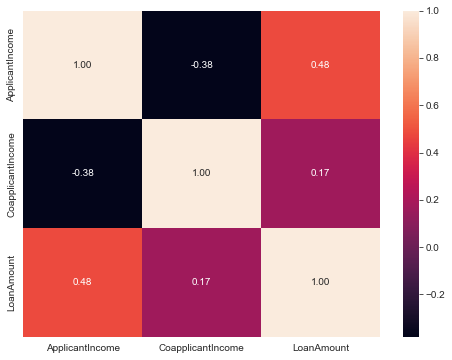

In [237]:
plt.figure(figsize=(8,6))
sns.heatmap(x_check.corr(),annot=True, fmt = ".2f", annot_kws={'size':10});
plt.show()

### Observation:
1. no multicollinearity

In [254]:
data6

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Status
0,1,0,0.0,1,0,0.544331,-1.102837,0.235387,1.0,3,0,0,0,0,0,1,0,0,0,1
1,1,1,1.0,1,0,0.170974,0.750578,-0.037659,1.0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0.0,1,1,-0.499955,-1.102837,-1.346305,1.0,3,0,0,0,0,0,1,0,0,0,1
3,1,1,0.0,0,0,-0.743873,0.891686,-0.167886,1.0,3,0,0,0,0,0,1,0,0,0,1
4,1,0,0.0,1,0,0.582817,-1.102837,0.158610,1.0,3,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,1,0.0,1,0,-0.379921,0.831258,-0.379235,1.0,1,0,0,0,0,0,1,0,0,0,1
562,0,0,0.0,1,0,-0.554885,-1.102837,-1.205100,1.0,1,0,0,0,0,0,1,0,0,0,1
563,1,1,1.0,1,0,1.023487,0.208603,1.372409,1.0,3,0,0,0,0,0,1,0,0,0,1
564,1,1,2.0,1,0,0.931750,-1.102837,0.738924,1.0,3,0,0,0,0,0,1,0,0,0,1


In [255]:
df_feat = data6.drop('Loan_Status', axis=1)
df_tgt = data6['Loan_Status']

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["variables"] = x_check.columns
vif["VIF"] = [variance_inflation_factor(x_check.values, i) for i in range(x_check.shape[1])]
vif.sort_values(by = 'VIF', ascending = False)

,variables,VIF
0,ApplicantIncome,1.807607
2,LoanAmount,1.591187
1,CoapplicantIncome,1.431146


### Observation:
1. We can see that multicollinerity is within permissible limit of 10.

## Dealing with Imbalenced label class

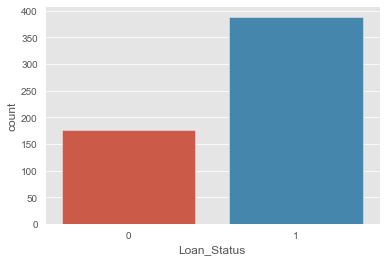

Counter({1: 389, 0: 177})

In [257]:
from collections import Counter
sns.countplot(x=df_tgt)
plt.show()
Counter(df_tgt)

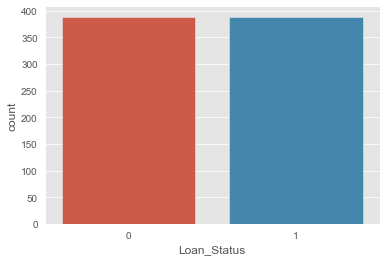

Counter({1: 389, 0: 389})

In [258]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, df_tgt)

sns.countplot(x=y_class)
plt.show()
Counter(y_class)

## Selecting maximum features which show more than 90% of the variation in attrition label using PCA

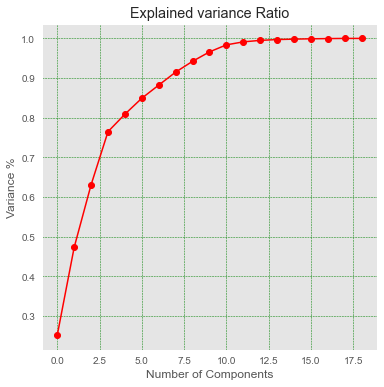

In [259]:
plt.style.use('ggplot')
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X)
plt.figure(figsize=(6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

### Observation:
1. From above graph we see 12 of the features are enough to understand the more than 95% of the variation in Attrition label.

In [260]:
x_new = PCA(n_components=12)
X = pd.DataFrame(x_new.fit_transform(X))

In [261]:
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.338989,-0.128002,0.357437,1.182281,-0.155578,0.069405,-0.155747,-0.041944,-0.013874,-0.453250,-0.046112,-0.030564
1,0.777843,0.288775,0.392820,-0.880321,-0.253693,-0.594847,0.076422,0.016612,-0.070229,0.007805,-0.136440,0.022119
2,-1.050863,-0.876983,-1.154954,0.817686,0.014432,-0.802740,0.052298,-0.532835,-0.226377,0.232142,0.921987,-0.022470
3,0.990782,-1.061493,-0.235059,0.870026,0.387742,0.030232,-0.664464,-0.304223,-0.338753,0.112732,-0.050668,0.014683
4,-1.362460,-0.138302,0.328079,1.174505,-0.140567,0.013551,-0.147902,0.000269,-0.035377,-0.445817,-0.055255,-0.028293
...,...,...,...,...,...,...,...,...,...,...,...,...
773,-0.573372,1.273464,-1.193188,0.863354,-0.195673,-0.349406,0.044615,-0.344725,-0.194943,-0.072903,-0.125323,-0.001279
774,-1.376282,-1.042237,-1.023590,0.811682,-0.535587,0.061035,0.012338,0.221450,0.003649,0.336665,-0.183166,-0.042201
775,-1.118287,-1.102859,-1.256836,0.782998,0.083779,-0.101986,0.026023,-0.077280,0.730730,-0.529880,0.078636,0.213265
776,-1.753098,-0.181115,0.052292,1.101113,0.116359,-0.841171,-0.037244,0.678480,-0.367927,-0.320652,-0.214741,0.012126


<h2 align="center"><font color = "red">Model Selection</font> </h2>

In [263]:
## TO PLOT CONFUSION MATRIX
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("====================")
    print('Confusion Matrix :\n')
    print(cm)
    print("====================")
    
    
## TO PLOT ROC_AUC CURVE
def plot_roc_auc_curve(fpr, tpr):
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    


# TO print classification report, confusion matrx, roc-auc curve
def print_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        print(f"Accuracy score for Train : {accuracy_score(y_train,y_pred) * 100:.2f}%")
        return round(accuracy_score(y_train,y_pred)*100,2)
#         print('\n \n Train Classification report \n', classification_report(y_train,y_pred, digits=2))
              
    elif train==False:
        y_pred = clf.predict(x_test)
        acc = round(accuracy_score(y_test,y_pred)*100,2)
        print(f"Accuracy score for Test : {accuracy_score(y_test,y_pred) * 100:.2f}%")
        confusion_matrix_c(y_test, y_pred)
        print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))
        
        diff = []
        best_cv = []
        for j in range(3, 12):
            cv_score = round(cross_val_score(clf, X, y_class, cv=j, scoring="accuracy").mean()*100,2)
            diff.append(abs(cv_score - acc))
            best_cv.append(j)
        k_f = best_cv[diff.index(min(diff))]
        cv_score = cross_val_score(clf,X, y_class, cv=k_f, scoring="accuracy").mean()
        print(f"Cross Validation score at best cv={k_f} is : {cv_score*100:.2f}%")
        y_predict_probabilities = clf.predict_proba(x_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
        roc_auc = auc(fpr, tpr)
        plot_roc_auc_curve(fpr, tpr)
        return acc,k_f, min(diff),cv_score*100

In [264]:
dtc = DecisionTreeClassifier()
etc = ExtraTreesClassifier()
gnb = GaussianNB()
knc = KNeighborsClassifier()
lgr = LogisticRegression()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
bgc = BaggingClassifier()

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for DecisionTreeClassifier model..
 
Best Random_state number for splitting the data is:  21
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 78.97%
Confusion Matrix :

[[89 21]
 [20 65]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.81       110
           1       0.76      0.76      0.76        85

    accuracy                           0.79       195
   macro avg       0.79      0.79      0.79       195
weighted avg       0.79      0.79      0.79       195

Cross Validation score at best cv=11 is : 78.28%


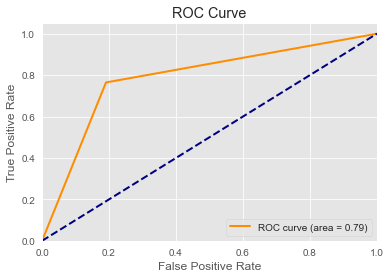

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for ExtraTreesClassifier model..
 
Best Random_state number for splitting the data is:  32
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 89.23%
Confusion Matrix :

[[82 13]
 [ 8 92]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.91      0.86      0.89        95
           1       0.88      0.92      0.90       100

    accuracy                           0.89       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.89      0.89      0.89       195

Cross Validation score at best cv=11 is : 83.68%


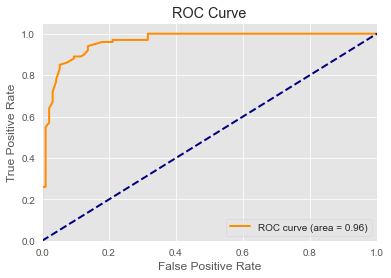

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for GaussianNB model..
 
Best Random_state number for splitting the data is:  28
 
Accuracy score for Train : 71.36%
Accuracy score for Test : 71.28%
Confusion Matrix :

[[58 39]
 [17 81]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.77      0.60      0.67        97
           1       0.68      0.83      0.74        98

    accuracy                           0.71       195
   macro avg       0.72      0.71      0.71       195
weighted avg       0.72      0.71      0.71       195

Cross Validation score at best cv=9 is : 71.22%


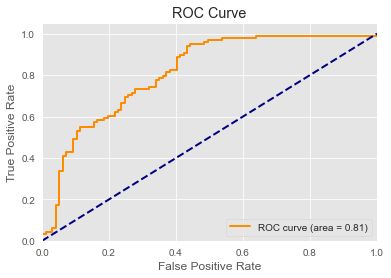

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for KNeighborsClassifier model..
 
Best Random_state number for splitting the data is:  112
 
Accuracy score for Train : 81.13%
Accuracy score for Test : 80.51%
Confusion Matrix :

[[75 20]
 [18 82]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        95
           1       0.80      0.82      0.81       100

    accuracy                           0.81       195
   macro avg       0.81      0.80      0.80       195
weighted avg       0.81      0.81      0.81       195

Cross Validation score at best cv=7 is : 77.25%


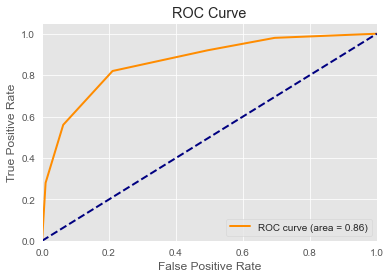

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for LogisticRegression model..
 
Best Random_state number for splitting the data is:  39
 
Accuracy score for Train : 76.33%
Accuracy score for Test : 76.41%
Confusion Matrix :

[[55 36]
 [10 94]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.85      0.60      0.71        91
           1       0.72      0.90      0.80       104

    accuracy                           0.76       195
   macro avg       0.78      0.75      0.75       195
weighted avg       0.78      0.76      0.76       195

Cross Validation score at best cv=9 is : 75.99%


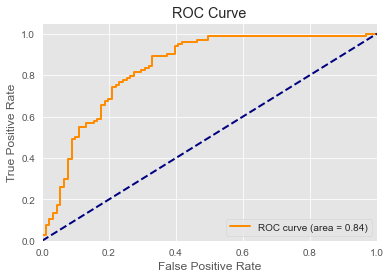

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for RandomForestClassifier model..
 
Best Random_state number for splitting the data is:  50
 
Accuracy score for Train : 100.00%
Accuracy score for Test : 86.67%
Confusion Matrix :

[[74 12]
 [14 95]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.89      0.87      0.88       109

    accuracy                           0.87       195
   macro avg       0.86      0.87      0.87       195
weighted avg       0.87      0.87      0.87       195

Cross Validation score at best cv=9 is : 82.53%


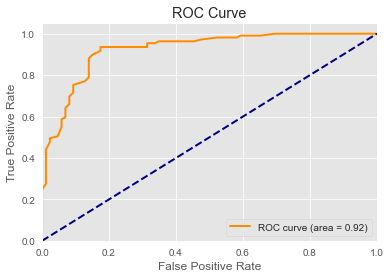

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for GradientBoostingClassifier model..
 
Best Random_state number for splitting the data is:  116
 
Accuracy score for Train : 94.85%
Accuracy score for Test : 82.56%
Confusion Matrix :

[[73 20]
 [14 88]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        93
           1       0.81      0.86      0.84       102

    accuracy                           0.83       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.83      0.83      0.83       195

Cross Validation score at best cv=5 is : 77.13%


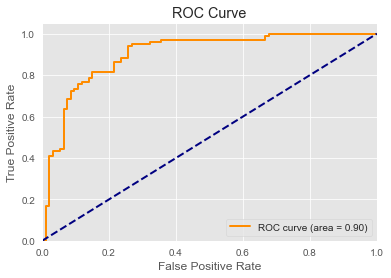

::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
 
 
for BaggingClassifier model..
 
Best Random_state number for splitting the data is:  9
 
Accuracy score for Train : 98.28%
Accuracy score for Test : 81.03%
Confusion Matrix :

[[79 18]
 [19 79]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        97
           1       0.81      0.81      0.81        98

    accuracy                           0.81       195
   macro avg       0.81      0.81      0.81       195
weighted avg       0.81      0.81      0.81       195

Cross Validation score at best cv=10 is : 77.63%


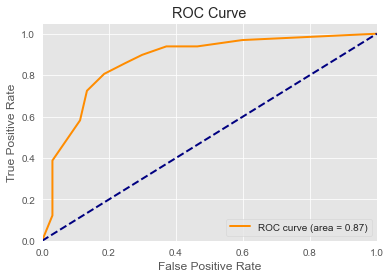

,algo,best random state,train_accuracy,test_accuracy,Score_diff,best cv fold,cross_val_score
2,GaussianNB,28,71.36,71.28,0.06,9,71.215361
4,LogisticRegression,39,76.33,76.41,0.42,9,75.991268
7,BaggingClassifier,9,98.28,81.03,1.21,10,77.629038
0,DecisionTreeClassifier,21,100.00,78.97,2.10,11,78.284251
3,KNeighborsClassifier,112,81.13,80.51,3.26,7,77.248805
5,RandomForestClassifier,50,100.00,86.67,4.39,9,82.534379
6,GradientBoostingClassifier,116,94.85,82.56,4.66,5,77.125724
1,ExtraTreesClassifier,32,100.00,89.23,5.28,11,83.680263


In [265]:
algo = [] #list to save ML algorithm name
rs = []
cv_fold = []
#lists to store evaluation metrics data for train set
train_accuracy = [] 

#lists to store evaluation metrics data for test set
test_accuracy = []

crossvalscore = []
score_diff = []


models = [dtc,etc,gnb,knc,lgr,rfc,gbc,bgc]
models_name = ['DecisionTreeClassifier','ExtraTreesClassifier', 'GaussianNB','KNeighborsClassifier','LogisticRegression',
               'RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier']
dummy_count = 0 #dummy variable for count purpose
for model in models:
    diff = []
    randomstate = []
    for i in range(0, 150):  ### loop to find best random state for splitting
        x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = i)
        model.fit(x_train, y_train)
        pred_train = model.predict(x_train)
        pred_test = model.predict(x_test)
        diff.append(abs(accuracy_score(y_train, pred_train) - accuracy_score(y_test, pred_test)))
        randomstate.append(i)
        
    best_i = randomstate[diff.index(min(diff))]
    rs.append(best_i)
    print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
    print(' ')
    print(' ')
    print('for '+ models_name[dummy_count] + ' model..')
    print(' ')
    print("Best Random_state number for splitting the data is: ", best_i)
    print(' ')
    
    ### splitting with best random state
    x_train, x_test, y_train, y_test = train_test_split(X, y_class, random_state=best_i, test_size=.25)
    
    
    ### training the model
    model.fit(x_train, y_train)
    algo.append(models_name[dummy_count])
    tr_ac = print_score(model, x_train, x_test, y_train, y_test, train=True)
    train_accuracy.append(tr_ac)
    test_ac, k_f, sc_diff, cvs = print_score(model, x_train, x_test, y_train, y_test, train=False)
    cv_fold.append(k_f)
    score_diff.append(sc_diff)
    test_accuracy.append(test_ac)
    crossvalscore.append(cvs)
#     print(cv_fold)
#     print(score_diff)
    dummy_count+=1

    
### dataframe to make list of all the ML algorithms & their evaluation metrics
table = pd.DataFrame(list(zip(algo, rs, train_accuracy, test_accuracy, score_diff, cv_fold, crossvalscore)),
                              columns =['algo', 'best random state', 'train_accuracy', 'test_accuracy', 'Score_diff','best cv fold', 'cross_val_score'])


### display dataframe & sort based on TEST MAE score.
table.sort_values(by=['Score_diff', 'test_accuracy', 'cross_val_score' ])

#### Observation
We will select ExtraTreesClassifier model as it has,
1. Highest in Cross validation score & highest test accuracy

<h1 align = "center"><font color = "red"><b> Hyper paramter tuning using GridSearchCV </b></font></h1>

In [266]:
x_train, x_test, y_train, y_test = train_test_split(X, y_class, test_size = 0.25, random_state = 32)

In [262]:
df_feat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0
0,1,0,0.0,1,0,0.544331,-1.102837,0.235387,1.0,3,0,0,0,0,0,1,0,0,0
1,1,1,1.0,1,0,0.170974,0.750578,-0.037659,1.0,1,0,0,0,0,0,1,0,0,0
2,1,1,0.0,1,1,-0.499955,-1.102837,-1.346305,1.0,3,0,0,0,0,0,1,0,0,0
3,1,1,0.0,0,0,-0.743873,0.891686,-0.167886,1.0,3,0,0,0,0,0,1,0,0,0
4,1,0,0.0,1,0,0.582817,-1.102837,0.158610,1.0,3,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,1,1,0.0,1,0,-0.379921,0.831258,-0.379235,1.0,1,0,0,0,0,0,1,0,0,0
562,0,0,0.0,1,0,-0.554885,-1.102837,-1.205100,1.0,1,0,0,0,0,0,1,0,0,0
563,1,1,1.0,1,0,1.023487,0.208603,1.372409,1.0,3,0,0,0,0,0,1,0,0,0
564,1,1,2.0,1,0,0.931750,-1.102837,0.738924,1.0,3,0,0,0,0,0,1,0,0,0


In [268]:
param_grid_etc = {'n_estimators':[100,200,300,400],
                  'criterion':["gini", "entropy"],
                  'max_depth':[2, 3, 4, 5],
                  'min_samples_split':[2, 3, 4]
                 }

In [269]:
etc_tune = ExtraTreesClassifier()

In [270]:
etc_grid = GridSearchCV(estimator = etc_tune,
                       param_grid = param_grid_etc,
                       verbose = 1,
                       scoring = 'accuracy')

In [271]:
etc_grid.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [273]:
etc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [350]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y_class = oversample.fit_resample(df_feat, df_tgt)

In [351]:
y_class.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

In [274]:
etc_grid.best_score_

0.7462717359269083

In [275]:
etc_final = ExtraTreesClassifier(criterion='entropy',
                                 max_depth=5,
                                 min_samples_split=2,
                                 n_estimators= 200)

In [276]:
etc_final.fit(x_train,y_train)
y_pred=etc_final.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8


Confusion Matrix :

[[62 33]
 [ 6 94]]

 
 Test Classification report 
               precision    recall  f1-score   support

           0       0.91      0.65      0.76        95
           1       0.74      0.94      0.83       100

    accuracy                           0.80       195
   macro avg       0.83      0.80      0.79       195
weighted avg       0.82      0.80      0.80       195

Cross Validation score at best cv = 9 is : 76.22%


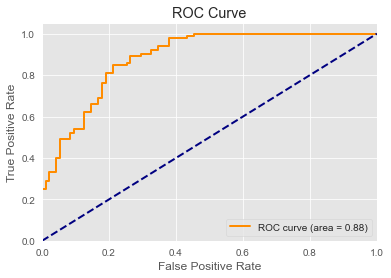

In [279]:
confusion_matrix_c(y_test, y_pred)
print('\n \n Test Classification report \n', classification_report(y_test, y_pred, digits=2))

cv_score = cross_val_score(etc_final,X, y_class, cv=11, scoring="accuracy").mean()
print(f"Cross Validation score at best cv = 9 is : {cv_score*100:.2f}%")
y_predict_probabilities = etc_final.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

### Observation:
After Hyperparameter tuning using Gridsearch CV we have improved both test & cross validation score.

<h1 align="center"><font color = "red">Model Saving</font> </h1>

In [280]:
filename='loan_application.pkl'
pickle.dump(etc_final,open(filename,'wb'))

In [282]:
model =pickle.load(open('loan_application.pkl','rb'))
pred =model.predict(x_test)
result = pd.DataFrame(list(zip(y_test, pred)), columns = ['Actual', 'Predicted'])
result

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,1,1
4,0,1
...,...,...
190,0,0
191,1,1
192,0,0
193,0,0
